<a href="https://colab.research.google.com/github/kkzkwtr/GCI_2025_summer_competition01/blob/main/GCI_competition01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [33]:
path = "/content/drive/My Drive/Colab Notebooks/GCI_2025_summer/Competitions/competition_1/"

df = pd.read_csv(path + 'data/train.csv')
df_test = pd.read_csv(path + 'data/test.csv')

#全結合データ
df_concat = pd.concat([df,df_test],ignore_index=True)

In [34]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です。
テストデータのデータ数は418、変数は11種類です


In [35]:
print(df_concat[:891].shape, df_concat[891:].shape)

(891, 12) (418, 12)


In [36]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Perished     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Perished     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###欠損値は'Age','Cabin','Embarked'

In [38]:
from sklearn.ensemble import RandomForestRegressor
#AgeをPclass, Sex, Parch, SibSpでランダムフォレストで推定

# 参照: https://qiita.com/jun40vn/items/d8a1f71fae680589e05c

#説明変数
age_df_concat = df_concat[["Age", "Pclass", "Sex", "Parch", "SibSp"]]

age_df_concat.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

#学習データ->欠損してないデータ、テストデータ->欠損データ
known_age = age_df_concat[age_df_concat.Age.notnull()].values
unknown_age = age_df_concat[age_df_concat.Age.isnull()].values

X = known_age[:, 1:]
y = known_age[:, 0]

# ランダムフォレスト年齢推定モデル
rf_age = RandomForestRegressor(n_estimators=100,random_state=42, n_jobs=-1)
rf_age.fit(X, y)

predictedAges = rf_age.predict(unknown_age[:, 1:])
df_concat.loc[ (df_concat.Age.isnull()), 'Age' ] = predictedAges

In [39]:
df_concat.isnull().sum()

,0
PassengerId,0
Perished,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


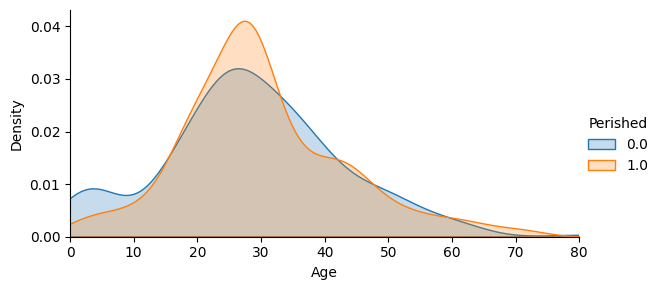

In [ ]:
#年齢別生存曲線と死亡曲線
facet = sns.FacetGrid(df_concat[:891], hue='Perished',aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df_concat[:891]['Age'].max()))
facet.add_legend()
plt.show()

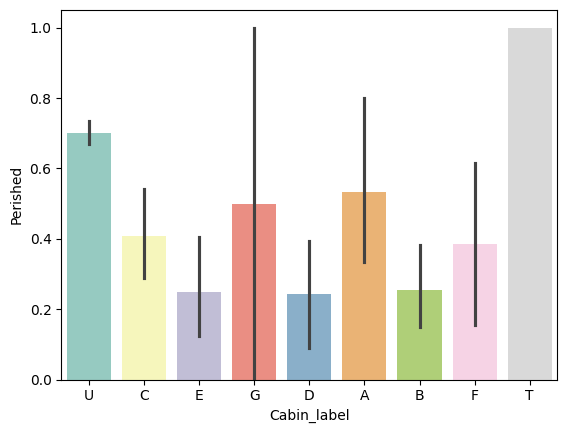

In [40]:
#Cabinの欠損値
df_concat['Cabin'] = df_concat['Cabin'].fillna('Unknown')
df_concat['Cabin_label'] = df_concat['Cabin'].str.get(0)
sns.barplot(x='Cabin_label', y='Perished', data=df_concat, palette='Set3')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Perished     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


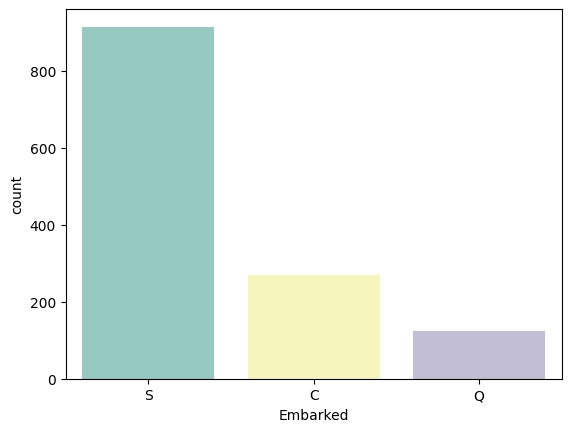

In [10]:
#Embarkedの分布
sns.countplot(x='Embarked', data=df_concat, palette='Set3')
plt.show()

In [41]:
df_concat['Embarked'].fillna('S', inplace=True)

df_concat.isnull().sum()

,0
PassengerId,0
Perished,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [42]:
#EmbarkedとPclassとの関係から(Embarked=S、Pclass=3)のFareのメジアン
fare = df_concat[(df_concat['Embarked'] == 'S')&(df_concat['Pclass'] == 3) ]['Fare'].median()
df_concat['Fare'].fillna(fare, inplace=True)
df_concat.isnull().sum()

,0
PassengerId,0
Perished,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Perished     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Cabin_label  1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [43]:
#Sexはone-hot化
# df_concat.replace({'Sex': {'male': 0, 'female': 1}},inplace=True)
sex = df_concat['Sex']
sex_ohe = pd.get_dummies(sex,prefix='Sex')
df_concat = pd.concat([df_concat, sex_ohe], axis=1)
df_concat.drop(['Sex'], axis=1, inplace=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Perished     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Cabin_label  1309 non-null   object 
 12  Sex_female   1309 non-null   bool   
 13  Sex_male     1309 non-null   bool   
dtypes: bool(2), float64(3), int64(4), object(5)
memory usage: 125.4+ KB


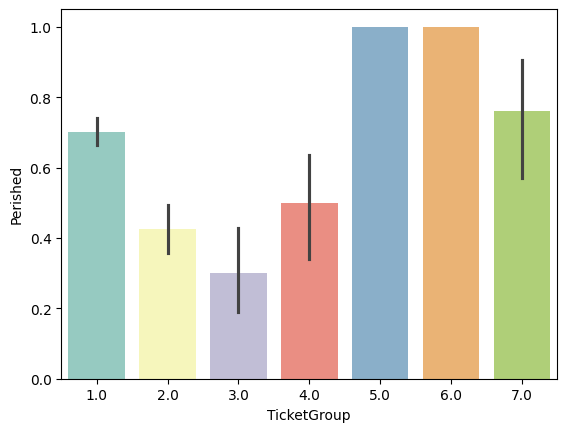

In [44]:
#Ticket統計
Ticket_counts = dict(df['Ticket'].value_counts())
df_concat['TicketGroup'] = df_concat['Ticket'].map(Ticket_counts)
sns.barplot(x='TicketGroup', y='Perished', data=df_concat, palette='Set3')
# sns.countplot(x='TicketGroup', data=df, palette='Set3')
plt.show()

# チケット番号のプレフィックスを抽出
# df['is_Ticket_Prefix'] = df['Ticket'].str.contains(r'[a-zA-Z]')
# # df_concat['is_Ticket_Prefix'] = df_concat['Ticket'].str.contains(r'[a-zA-Z]')
# sns.barplot(x='is_Ticket_Prefix', y='Perished', data=df, palette='Set3')
# plt.show()

In [45]:
# Ticketのグルーピング
df_concat.loc[(df_concat['TicketGroup'] >= 2) & (df_concat['TicketGroup'] <= 4), 'Ticket_label'] = 2
df_concat.loc[(df_concat['TicketGroup'] == 5) & (df_concat['TicketGroup'] == 6), 'Ticket_label'] = 1
df_concat.loc[(df_concat['TicketGroup'] >= 7) | (df_concat['TicketGroup'] == 1), 'Ticket_label'] = 0
df_concat.drop(['TicketGroup','Ticket'], axis=1, inplace=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Perished      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Age           1309 non-null   float64
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Fare          1309 non-null   float64
 8   Cabin         1309 non-null   object 
 9   Embarked      1309 non-null   object 
 10  Cabin_label   1309 non-null   object 
 11  Sex_female    1309 non-null   bool   
 12  Sex_male      1309 non-null   bool   
 13  Ticket_label  1009 non-null   float64
dtypes: bool(2), float64(4), int64(4), object(4)
memory usage: 125.4+ KB


In [46]:
#Nameの特徴量エンジニアリング
df_concat['Title'] = df_concat['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df_concat['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Major,2
Mlle,2


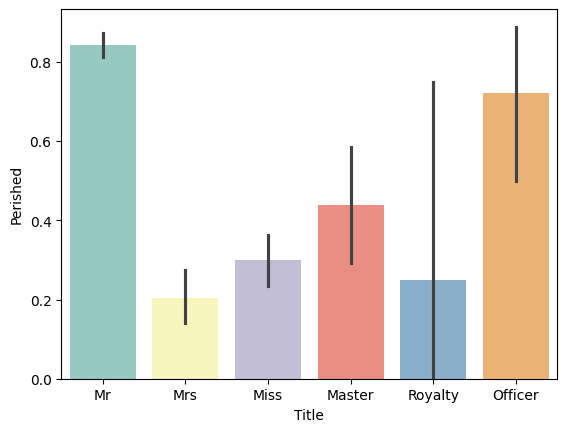

In [47]:
df_concat['Title'].replace(['Rev','Dr', 'Col', 'Major', 'Capt'], 'Officer', inplace=True)
df_concat['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
df_concat['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs', inplace=True)
df_concat['Title'].replace(['Mlle', 'Miss'], 'Miss', inplace=True)
df_concat['Title'].replace(['Mr'], 'Mr', inplace=True)
df_concat['Title'].replace(['Jonkheer'],'Master', inplace=True)
sns.barplot(x='Title', y='Perished', data=df_concat[:891], palette='Set3')
plt.show()

In [48]:
#Name,Ticketは使わない
df_concat.drop(['Name'], axis=1, inplace=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Perished      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Age           1309 non-null   float64
 4   SibSp         1309 non-null   int64  
 5   Parch         1309 non-null   int64  
 6   Fare          1309 non-null   float64
 7   Cabin         1309 non-null   object 
 8   Embarked      1309 non-null   object 
 9   Cabin_label   1309 non-null   object 
 10  Sex_female    1309 non-null   bool   
 11  Sex_male      1309 non-null   bool   
 12  Ticket_label  1009 non-null   float64
 13  Title         1309 non-null   object 
dtypes: bool(2), float64(4), int64(4), object(4)
memory usage: 125.4+ KB


In [49]:
#embarkedのone-hot化
emberked = df_concat['Embarked']
emberked_ohe = pd.get_dummies(emberked,prefix='Embarked')
df_concat = pd.concat([df_concat, emberked_ohe], axis=1)
df_concat.drop(['Embarked'], axis=1, inplace=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Perished      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Age           1309 non-null   float64
 4   SibSp         1309 non-null   int64  
 5   Parch         1309 non-null   int64  
 6   Fare          1309 non-null   float64
 7   Cabin         1309 non-null   object 
 8   Cabin_label   1309 non-null   object 
 9   Sex_female    1309 non-null   bool   
 10  Sex_male      1309 non-null   bool   
 11  Ticket_label  1009 non-null   float64
 12  Title         1309 non-null   object 
 13  Embarked_C    1309 non-null   bool   
 14  Embarked_Q    1309 non-null   bool   
 15  Embarked_S    1309 non-null   bool   
dtypes: bool(5), float64(4), int64(4), object(3)
memory usage: 119.0+ KB


In [50]:
cabin_label = df_concat['Cabin_label']
cabin_ohe = pd.get_dummies(cabin_label,prefix='Cabin')
df_concat = pd.concat([df_concat, cabin_ohe], axis=1)
df_concat.drop(['Cabin'], axis=1, inplace=True)
df_concat.drop(['Cabin_label'], axis=1, inplace=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Perished      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Age           1309 non-null   float64
 4   SibSp         1309 non-null   int64  
 5   Parch         1309 non-null   int64  
 6   Fare          1309 non-null   float64
 7   Sex_female    1309 non-null   bool   
 8   Sex_male      1309 non-null   bool   
 9   Ticket_label  1009 non-null   float64
 10  Title         1309 non-null   object 
 11  Embarked_C    1309 non-null   bool   
 12  Embarked_Q    1309 non-null   bool   
 13  Embarked_S    1309 non-null   bool   
 14  Cabin_A       1309 non-null   bool   
 15  Cabin_B       1309 non-null   bool   
 16  Cabin_C       1309 non-null   bool   
 17  Cabin_D       1309 non-null   bool   
 18  Cabin_E       1309 non-null 

In [51]:
#Family変数の追加 + グルーピング
#https://qiita.com/jun40vn/items/d8a1f71fae680589e05c
df_concat['Family'] = df_concat['SibSp'] + df_concat['Parch'] + 1
df_concat.loc[(df_concat['Family'] >= 2) & (df_concat['Family'] <= 4), 'Family_label'] = 2
df_concat.loc[(df_concat['Family'] >= 5) & (df_concat['Family'] <= 7) | (df_concat['Family']==1), 'Family_label'] = 1
df_concat.loc[(df_concat['Family'] >= 8), 'Family_label'] = 0
df_concat.drop(['Family','SibSp','Parch'], axis=1, inplace=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Perished      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Age           1309 non-null   float64
 4   Fare          1309 non-null   float64
 5   Sex_female    1309 non-null   bool   
 6   Sex_male      1309 non-null   bool   
 7   Ticket_label  1009 non-null   float64
 8   Title         1309 non-null   object 
 9   Embarked_C    1309 non-null   bool   
 10  Embarked_Q    1309 non-null   bool   
 11  Embarked_S    1309 non-null   bool   
 12  Cabin_A       1309 non-null   bool   
 13  Cabin_B       1309 non-null   bool   
 14  Cabin_C       1309 non-null   bool   
 15  Cabin_D       1309 non-null   bool   
 16  Cabin_E       1309 non-null   bool   
 17  Cabin_F       1309 non-null   bool   
 18  Cabin_G       1309 non-null 

In [52]:
Title = df_concat['Title']
Title_ohe = pd.get_dummies(Title,prefix='Title')
df_concat = pd.concat([df_concat, Title_ohe], axis=1)
df_concat.drop(['Title'], axis=1, inplace=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Perished       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Age            1309 non-null   float64
 4   Fare           1309 non-null   float64
 5   Sex_female     1309 non-null   bool   
 6   Sex_male       1309 non-null   bool   
 7   Ticket_label   1009 non-null   float64
 8   Embarked_C     1309 non-null   bool   
 9   Embarked_Q     1309 non-null   bool   
 10  Embarked_S     1309 non-null   bool   
 11  Cabin_A        1309 non-null   bool   
 12  Cabin_B        1309 non-null   bool   
 13  Cabin_C        1309 non-null   bool   
 14  Cabin_D        1309 non-null   bool   
 15  Cabin_E        1309 non-null   bool   
 16  Cabin_F        1309 non-null   bool   
 17  Cabin_G        1309 non-null   bool   
 18  Cabin_T 

In [54]:
df = df_concat[:891]
df_test = df_concat[891:]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Perished       0 non-null      float64
 2   Pclass         418 non-null    int64  
 3   Age            418 non-null    float64
 4   Fare           418 non-null    float64
 5   Sex_female     418 non-null    bool   
 6   Sex_male       418 non-null    bool   
 7   Ticket_label   146 non-null    float64
 8   Embarked_C     418 non-null    bool   
 9   Embarked_Q     418 non-null    bool   
 10  Embarked_S     418 non-null    bool   
 11  Cabin_A        418 non-null    bool   
 12  Cabin_B        418 non-null    bool   
 13  Cabin_C        418 non-null    bool   
 14  Cabin_D        418 non-null    bool   
 15  Cabin_E        418 non-null    bool   
 16  Cabin_F        418 non-null    bool   
 17  Cabin_G        418 non-null    bool   
 18  Cabin_T

In [55]:
X = df.drop(['PassengerId', 'Perished'], axis=1).values
y = df['Perished'].values
X_test = df_test.drop(['PassengerId', 'Perished'], axis=1).values

In [56]:
X.shape, y.shape, X_test.shape

((891, 25), (891,), (418, 25))

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None,3, 5],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10]
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X, y)

print("Best parameters: ", grid_rf.best_params_)
print('CV Score: ', grid_rf.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
CV Score:  0.836137091205825


In [59]:
rf = RandomForestClassifier(
    max_depth=None,n_estimators=100,min_samples_leaf=3,min_samples_split=2,
    random_state=42, n_jobs=-1
)

# 特徴量を20個に絞る
# from sklearn.feature_selection import SelectKBest
# from sklearn.pipeline import make_pipeline
# select = SelectKBest(k = 20)

# pipe = make_pipeline(select, rf)
# pipe.fit(X_train, y_train)
rf.fit(X_train, y_train)
print('Train Score: ', rf.score(X_train, y_train))
print('Valid Score: ', rf.score(X_valid, y_valid))

Train Score:  0.884430176565008
Valid Score:  0.8059701492537313


In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
print('Train Score: ', lr.score(X_train, y_train))
print('Valid Score: ', lr.score(X_valid, y_valid))

Train Score:  0.812199036918138
Valid Score:  0.8059701492537313


In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 100 ,10),random_state=42)
mlpc.fit(X_train, y_train)
print('Train Score: ', mlpc.score(X_train, y_train))
print('Valid Score: ', mlpc.score(X_valid, y_valid))

Train Score:  0.8330658105939005
Valid Score:  0.8022388059701493


In [ ]:
#XGBoost
import xgboost as xgb

xgb_find = xgb.XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10]
}

grid_xgb = GridSearchCV(xgb_find, param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(X, y)

print("Best parameters: ", grid_xgb.best_params_)
print('CV Score: ', grid_xgb.best_score_)


Best parameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
CV Score:  0.8282970309459545


In [ ]:
xgb_model = xgb.XGBClassifier(
    max_depth=3,n_estimators=100,min_samples_leaf=1,min_samples_split=2,
    random_state=42, n_job=-1,
)

xgb_model.fit(X_train, y_train)
print('Train Score: ', xgb_model.score(X_train, y_train))
print('Valid Score: ', xgb_model.score(X_valid, y_valid))

Train Score:  0.9357945425361156
Valid Score:  0.7985074626865671


In [ ]:
# GBC
from sklearn.ensemble import GradientBoostingClassifier

gbc_find = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'learning_rate': [0.01, 0.1],
    'validation_fraction': [0.1, 0.2]
}

grid_gbc = GridSearchCV(gbc_find, param_grid, cv=5, scoring='accuracy')
grid_gbc.fit(X, y)

print("Best parameters: ", grid_gbc.best_params_)
print('CV Score: ', grid_gbc.best_score_)

ValueError: 
All the 720 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 658, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
# NaNを確認
import numpy as np
np.isnan(X).any()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
#LightGBM
import lightgbm as lgb
lgb_find = lgb.LGBMClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [-1, 5, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3],
}

grid_lgb = GridSearchCV(lgb_find, param_grid, cv=5, scoring='accuracy')
grid_lgb.fit(X, y)

print("Best parameters: ", grid_lgb.best_params_)
print('CV Score: ', grid_lgb.best_score_)

ストリーミング出力は最後の 5000 行に切り捨てられました。
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 439, number 

In [ ]:
lgb = lgb.LGBMClassifier(
    max_depth=5,n_estimators=100,min_samples_leaf=3,min_samples_split=2,
    random_state=42, n_job=-1,
)

lgb.fit(X_train, y_train)
print('Train Score: ', lgb.score(X_train, y_train))
print('Valid Score: ', lgb.score(X_valid, y_valid))

[LightGBM] [Warning] Unknown parameter: n_job
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_job
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 392, number of negative: 231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629213 -> initscore=0.528844
[LightGBM] [Info] Start training from score 0.528844
[LightGBM] 

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[
        ('rfc', rf),
        ('xgb', xgb_model),
        ('lgb', lgb)
    ],
    voting='soft'
)

voting.fit(X_train, y_train)
print('Train Score: ', voting.score(X_train, y_train))
print('Valid Score: ', voting.score(X_valid, y_valid))

[LightGBM] [Warning] Unknown parameter: n_job
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_job
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 392, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629213 -> initscore=0.528844


In [ ]:
rfc_pred = pipe.predict_proba(X_test)
pred = rfc_pred.argmax(axis=1)

In [60]:
#ランダムフォレスト単独のcsv
rfc_pred = rf.predict_proba(X_test)
pred = rfc_pred.argmax(axis=1)

In [ ]:
rfc_pred = rf.predict_proba(X_test)
lr_pred = lr.predict_proba(X_test)
mlpc_pred = mlpc.predict_proba(X_test)

pred_proba = (rfc_pred + lr_pred + mlpc_pred) / 3
pred = pred_proba.argmax(axis=1)

In [61]:
path = '/content/drive/My Drive/Colab Notebooks/GCI_2025_summer/Competitions/competition_1/'

submission = pd.read_csv(path + 'gender_submission.csv')
submission

,PassengerId,Perished
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [62]:
pred.shape

(418,)

In [63]:
submission['Perished'] = pred
submission

,PassengerId,Perished
0,892,1
1,893,1
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [64]:
# JupyterLabなどローカルで作業する場合
# パスは必要に応じて変更の必要あり
submission.to_csv('/content/drive/My Drive/Colab Notebooks/GCI_2025_summer/Competitions/competition_1/submission_v6.csv', index=False)